In [1]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
RANDOM_SEED = 42

# 各パス指定

In [3]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [4]:
NUM_CLASSES = 12

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,202 (4.70 KB)

 Trainable params: 1,202 (4.70 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# import os

# hdf5_file_path = "model/keypoint_classifier/keypoint_classifier.hdf5"
# keras_file_path = hdf5_file_path[:-5] + ".keras"  # Replace the file extension
# os.rename(hdf5_file_path, keras_file_path)

In [11]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    'model/keypoint_classifier/keypoint_classifier.keras', verbose=1, save_weights_only=False)

# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [12]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [13]:
model.fit(
    X_train,
    y_train,
    epochs=170,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 26s 994ms/step - accuracy: 0.0391 - loss: 2.6546
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0565 - loss: 2.5862 - val_accuracy: 0.2827 - val_loss: 2.3497
Epoch 2/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.1797 - loss: 2.3299
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2048 - loss: 2.2956 - val_accuracy: 0.3322 - val_loss: 2.1164
Epoch 3/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3125 - loss: 2.1115
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3237 - loss: 2.0351 - val_accuracy: 0.3843 - val_loss: 1.7794
Epoch 4/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3203 - loss: 1.8482
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
2

 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6484 - loss: 0.7717
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6583 - loss: 0.8362 - val_accuracy: 0.8326 - val_loss: 0.5913
Epoch 26/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7422 - loss: 0.7296
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6836 - loss: 0.8017 - val_accuracy: 0.8377 - val_loss: 0.5806
Epoch 27/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7578 - loss: 0.7795
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.7971 - val_accuracy: 0.8412 - val_loss: 0.5670
Epoch 28/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7188 - loss: 0.7337
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━

 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7734 - loss: 0.5968
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7552 - loss: 0.6718 - val_accuracy: 0.9086 - val_loss: 0.4216
Epoch 50/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7109 - loss: 0.6917
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.6762 - val_accuracy: 0.9103 - val_loss: 0.4202
Epoch 51/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7812 - loss: 0.6578
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7551 - loss: 0.6638 - val_accuracy: 0.9146 - val_loss: 0.4196
Epoch 52/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7344 - loss: 0.7134
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━

 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8125 - loss: 0.5483
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7706 - loss: 0.6370 - val_accuracy: 0.9189 - val_loss: 0.3714
Epoch 74/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8359 - loss: 0.5201
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7806 - loss: 0.6135 - val_accuracy: 0.9189 - val_loss: 0.3649
Epoch 75/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7109 - loss: 0.6612
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7502 - loss: 0.6389 - val_accuracy: 0.9206 - val_loss: 0.3777
Epoch 76/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7812 - loss: 0.7225
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━

 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7969 - loss: 0.5244
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7781 - loss: 0.5950 - val_accuracy: 0.9257 - val_loss: 0.3542
Epoch 98/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7812 - loss: 0.5808
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7853 - loss: 0.6055 - val_accuracy: 0.9231 - val_loss: 0.3551
Epoch 99/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7812 - loss: 0.5785
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7876 - loss: 0.5806 - val_accuracy: 0.9240 - val_loss: 0.3479
Epoch 100/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7344 - loss: 0.7470
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 

 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7812 - loss: 0.5849
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7920 - loss: 0.5741 - val_accuracy: 0.9266 - val_loss: 0.3396
Epoch 122/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7266 - loss: 0.7128
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7821 - loss: 0.5970 - val_accuracy: 0.9249 - val_loss: 0.3444
Epoch 123/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7734 - loss: 0.5676
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7954 - loss: 0.5664 - val_accuracy: 0.9249 - val_loss: 0.3395
Epoch 124/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7266 - loss: 0.6997
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.keras
2

 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7969 - loss: 0.5644
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7997 - loss: 0.5846 - val_accuracy: 0.9300 - val_loss: 0.3312
Epoch 146/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8594 - loss: 0.6097
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8047 - loss: 0.5673 - val_accuracy: 0.9300 - val_loss: 0.3237
Epoch 147/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7422 - loss: 0.7093
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7916 - loss: 0.5662 - val_accuracy: 0.9266 - val_loss: 0.3242
Epoch 148/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7734 - loss: 0.5341
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.keras
2

 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8672 - loss: 0.3843
Epoch 169: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8175 - loss: 0.5188 - val_accuracy: 0.9291 - val_loss: 0.3220
Epoch 170/170
 1/28 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8281 - loss: 0.4801
Epoch 170: saving model to model/keypoint_classifier/keypoint_classifier.keras
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8069 - loss: 0.5380 - val_accuracy: 0.9266 - val_loss: 0.3240


In [14]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9199 - loss: 0.3593 


In [15]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [16]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[8.8657311e-04 8.0996120e-01 1.2099189e-01 5.0629211e-07 6.8157844e-02
 7.4985948e-08 1.9449893e-09 3.2573141e-08 1.4683070e-06 2.6114125e-07
 1.6594447e-09 1.2201493e-08]
1


# 混同行列

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


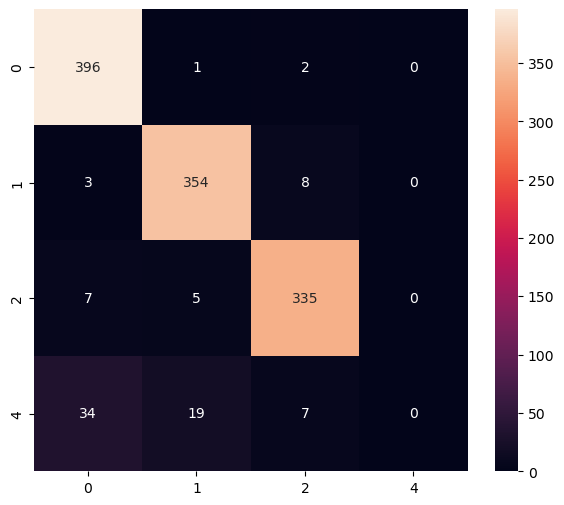

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       399
           1       0.93      0.97      0.95       365
           2       0.95      0.97      0.96       347
           4       0.00      0.00      0.00        60

    accuracy                           0.93      1171
   macro avg       0.70      0.73      0.71      1171
weighted avg       0.88      0.93      0.90      1171



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [18]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [ ]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ar646\AppData\Local\Temp\tmpviv9z24q\assets


INFO:tensorflow:Assets written to: C:\Users\ar646\AppData\Local\Temp\tmpviv9z24q\assets


# 推論テスト

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))